In [1]:
import pandas as pd
import numpy as np

In [ ]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Обучение модели DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Оценка качества на тестовой выборке
y_pred_dtc = dtc.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy DecisionTreeClassifier: {acc_DT}")

# Обучение модели BaggingClassifier со 100 деревьями
bc = BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE)
bc.fit(X_train, y_train)

# Оценка качества на тестовой выборке
y_pred_bc = bc.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred_bc)
print(f"Accuracy BaggingClassifier: {acc_Bagging}")

# Обучение модели RandomForestClassifier со 100 деревьями
rfc = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)

# Оценка качества на тестовой выборке
y_pred_rfc = rfc.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy RandomForestClassifier: {acc_RF}")

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

Accuracy DecisionTreeClassifier: 0.5541666666666667
Accuracy BaggingClassifier: 0.6416666666666667
Accuracy RandomForestClassifier: 0.6541666666666667


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



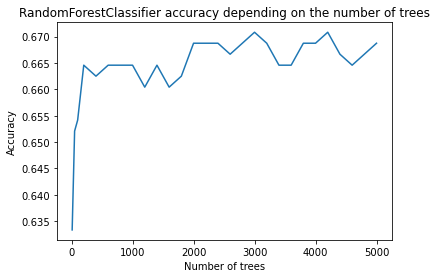

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# список для сохранения значения accuracy
accuracy_list = []

gen_tries = [i for i in range(200, 5001, 200)]

tries = [10, 50, 100] + gen_tries
tries

# итерации по количеству деревьев
for n_trees in tries:
    # обучение модели
    model = RandomForestClassifier(n_estimators=n_trees, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    # оценка качества на тестовой выборке
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# построение графика зависимости качества от числа деревьев
plt.plot(tries, accuracy_list)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('RandomForestClassifier accuracy depending on the number of trees')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [24]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

# sklearn GradientBoostingClassifier
sklearn_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
acc_sklearn = cross_val_score(sklearn_gb, X, y, cv=5, scoring='accuracy')
print(f'sklearn GradientBoostingClassifier accuracy: {acc_sklearn.mean()}')

# xgboost XGBClassifier
xgb_gb = xgb.XGBClassifier(random_state=RANDOM_STATE)
acc_xgboost = cross_val_score(xgb_gb, X, y, cv=5, scoring='accuracy')
print(f'xgboost XGBClassifier accuracy: {acc_xgboost.mean()}')

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

sklearn GradientBoostingClassifier accuracy: 0.5653467868338558
[14:21:45] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\soft\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:46] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:47] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:48] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:49] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

D:\soft\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [28]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

# Определить параметры для оптимизации и диапазоны их значений
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# для sklearn GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_grid = GridSearchCV(gb_clf, param_grid, cv=3)
gb_grid.fit(X_train, y_train)
best_params_sklearn = gb_grid.best_params_
acc_sklearn_cv = gb_grid.score(X_test, y_test)

# для xgboost XGBClassifier
xgb_clf = xgb.XGBClassifier(random_state=RANDOM_STATE)
xgb_grid = GridSearchCV(xgb_clf, param_grid, cv=3)
xgb_grid.fit(X_train, y_train)
best_params_xgboost = xgb_grid.best_params_
acc_xgboost_cv = xgb_grid.score(X_test, y_test)

print("Accuracy on test set:", acc_sklearn_cv)
print("Accuracy on test set:", acc_xgboost_cv)

print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)

results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

D:\soft\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:16] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:17] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with th

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

gb_lightgbm = LGBMClassifier()
gb_catboost = CatBoostClassifier(verbose=0)

scores_lightgbm = cross_val_score(gb_lightgbm, X, y, cv=5)
scores_catboost = cross_val_score(gb_catboost, X, y, cv=5)

acc_lightgbm = scores_lightgbm.mean()
acc_catboost = scores_catboost.mean()
print('Accuracy scores for LGBMClassifier: ', acc_lightgbm)
print('Accuracy scores for CatBoostClassifier: ', acc_catboost)

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

Accuracy scores for LGBMClassifier:  0.5572472570532915
Accuracy scores for CatBoostClassifier:  0.5459757053291535


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

# Определить параметры для оптимизации и диапазоны их значений
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}


# определение модели градиентного бустинга lightgbm
lgb_model = LGBMClassifier()
lgb_gs = GridSearchCV(lgb_model, param_grid, cv=3)
lgb_gs.fit(X_train, y_train)
best_params_lightgbm = lgb_gs.best_params_

# определение модели градиентного бустинга catboost
cat_model = CatBoostClassifier()
cat_gs = GridSearchCV(cat_model, param_grid, cv=3)
cat_gs.fit(X_train, y_train)
best_params_catboost = cat_gs.best_params_

# создание моделей с лучшими параметрами и получение метрики accuracy на тестовой выборке
lgb_best_model = LGBMClassifier(**best_params_lightgbm)
lgb_best_model.fit(X_train, y_train)
lgb_pred = lgb_best_model.predict(X_test)
acc_lightgbm_cv = accuracy_score(y_test, lgb_pred)

cat_best_model = CatBoostClassifier(**best_params_catboost)
cat_best_model.fit(X_train, y_train)
cat_pred = cat_best_model.predict(X_test)
acc_catboost_cv = accuracy_score(y_test, cat_pred)


print('LightGBM accuracy:', acc_lightgbm_cv)
print('CatBoost accuracy:', acc_catboost_cv)

print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
print('Параметры лучшей модели catboost:\n', best_params_catboost)

results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

0:	learn: 1.7796967	total: 2.87ms	remaining: 141ms
1:	learn: 1.7641010	total: 5.84ms	remaining: 140ms
2:	learn: 1.7510242	total: 8.24ms	remaining: 129ms
3:	learn: 1.7370490	total: 10.8ms	remaining: 124ms
4:	learn: 1.7240102	total: 13.2ms	remaining: 119ms
5:	learn: 1.7114535	total: 15.6ms	remaining: 114ms
6:	learn: 1.7003330	total: 17.9ms	remaining: 110ms
7:	learn: 1.6886583	total: 20.4ms	remaining: 107ms
8:	learn: 1.6766717	total: 22.8ms	remaining: 104ms
9:	learn: 1.6648858	total: 25.4ms	remaining: 101ms
10:	learn: 1.6531831	total: 27.6ms	remaining: 97.9ms
11:	learn: 1.6411838	total: 30ms	remaining: 95ms
12:	learn: 1.6316364	total: 32.3ms	remaining: 92ms
13:	learn: 1.6208070	total: 34.5ms	remaining: 88.7ms
14:	learn: 1.6122152	total: 37.1ms	remaining: 86.5ms
15:	learn: 1.6018063	total: 39.4ms	remaining: 83.8ms
16:	learn: 1.5922253	total: 41.7ms	remaining: 81ms
17:	learn: 1.5826144	total: 44.1ms	remaining: 78.3ms
18:	learn: 1.5725874	total: 46.3ms	remaining: 75.6ms
19:	learn: 1.5633249	

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [17]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)


le = LabelEncoder()
y_train = le.fit_transform(y_train)

def objective(trial):
    # Определяем диапазоны для параметров, которые будут оптимизироваться
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1)
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 9)
    
    # Создаем классификатор с заданными параметрами
    model = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    # Вычисляем значение метрики accuracy по кросс-валидации
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    # Возвращаем среднее значение метрики по всем фолдам
    return score.mean()



study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


best_params_xgboost_optuna = study.best_trial
acc_xgboost_optuna = best_params_xgboost_optuna.value
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
print('acc_xgboost_optuna', acc_xgboost_optuna)
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

[I 2023-04-02 20:22:55,677] A new study created in memory with name: no-name-62ea9ec5-a590-42cd-8d80-bdaa5bbc6dfd
[I 2023-04-02 20:22:57,560] Trial 0 finished with value: 0.6058981233243967 and parameters: {'learning_rate': 0.02150303424260348, 'n_estimators': 169, 'max_depth': 3}. Best is trial 0 with value: 0.6058981233243967.
[I 2023-04-02 20:23:00,448] Trial 1 finished with value: 0.6282394995531725 and parameters: {'learning_rate': 0.05100636971535664, 'n_estimators': 231, 'max_depth': 4}. Best is trial 1 with value: 0.6282394995531725.
[I 2023-04-02 20:23:02,588] Trial 2 finished with value: 0.6353887399463807 and parameters: {'learning_rate': 0.09716121133597132, 'n_estimators': 170, 'max_depth': 4}. Best is trial 2 with value: 0.6353887399463807.
[I 2023-04-02 20:23:06,846] Trial 3 finished with value: 0.6336014298480787 and parameters: {'learning_rate': 0.03434058026133195, 'n_estimators': 203, 'max_depth': 9}. Best is trial 2 with value: 0.6353887399463807.
[I 2023-04-02 20:2

Параметры лучшей модели xgboost:
 FrozenTrial(number=12, state=TrialState.COMPLETE, values=[0.6487935656836461], datetime_start=datetime.datetime(2023, 4, 2, 20, 23, 31, 381256), datetime_complete=datetime.datetime(2023, 4, 2, 20, 23, 33, 766860), params={'learning_rate': 0.08419186309435932, 'n_estimators': 126, 'max_depth': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=False, low=1e-05, step=None), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=9, log=False, low=3, step=1)}, trial_id=12, value=None)
acc_xgboost_optuna 0.6487935656836461


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

# Создание моделей градиентного бустинга
gbm = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb = XGBClassifier(random_state=RANDOM_STATE)
lgbm = LGBMClassifier(random_state=RANDOM_STATE)
cat = CatBoostClassifier(random_state=RANDOM_STATE, verbose=False)


# Создание стекинга
estimators = [('gbm', gbm), ('xgb', xgb), ('lgbm', lgbm), ('cat', cat)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


stacking.fit(X_train, y_train)

y_pred = stacking.predict(X_test)

# Расчет метрики accuracy
acc_stacking_default = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_stacking_default}')

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

Accuracy: 0.6770833333333334


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('winequality-red.csv', sep = ';')

# X - матрица признаков, y - целевая переменная
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=RANDOM_STATE)

# Создание моделей градиентного бустинга
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
xgb = XGBClassifier(random_state=RANDOM_STATE)
lgbm = LGBMClassifier(random_state=RANDOM_STATE)
cat = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

# Создание стекинга
estimators = [('gb', gb), ('xgb', xgb), ('lgbm', lgbm), ('cat', cat)]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


# Определить параметры для оптимизации и диапазоны их значений

params = {
    'gb__learning_rate': [0.01, 0.1, 1],
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 1],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'lgbm__learning_rate': [0.01, 0.1, 1],
    'lgbm__n_estimators': [50, 100, 200],
    'lgbm__max_depth': [3, 5, 7],
    'cat__learning_rate': [0.01, 0.1, 1],
    'cat__n_estimators': [50, 100, 200],
    'cat__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(stacking, param_grid=params, cv=3, scoring='accuracy')

# Обучение модели на тренировочных данных
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_


best_params.fit(X_train, y_train)

y_pred = best_params.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred)

print(f'acc_stacking: {acc_stacking}')
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results